<a href="https://colab.research.google.com/github/aviralhub/URL_website_detection/blob/main/URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

Gathering the data


In [ ]:
data =  pd.read_csv("/content/drive/MyDrive/phishing_website_dataset.csv")
data.shape

(188637, 56)

EDA

In [ ]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188637 entries, 0 to 188636
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    188637 non-null  object 
 1   URL                         188637 non-null  object 
 2   URLLength                   188637 non-null  int64  
 3   Domain                      188637 non-null  object 
 4   DomainLength                188637 non-null  int64  
 5   IsDomainIP                  188637 non-null  int64  
 6   TLD                         188637 non-null  object 
 7   URLSimilarityIndex          188637 non-null  float64
 8   CharContinuationRate        188637 non-null  float64
 9   TLDLegitimateProb           188637 non-null  float64
 10  URLCharProb                 188637 non-null  float64
 11  TLDLength                   188637 non-null  int64  
 12  NoOfSubDomain               188637 non-null  int64  
 13  HasObfuscation

In [ ]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,...,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000,188637.000000
mean,34.164326,21.369445,0.002486,79.353178,0.849141,0.261557,0.055930,2.762258,1.163950,0.001993,...,0.242975,0.023855,0.500125,26.713142,6.347154,10.815068,67.319858,2.437099,50.759978,0.589868
std,39.916861,9.033410,0.049800,28.663823,0.214566,0.251490,0.010513,0.597423,0.593343,0.044601,...,0.428881,0.152599,0.500001,75.828138,12.128622,17.548149,187.760312,18.296732,168.241387,0.491859
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001174,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,58.729877,0.687500,0.006970,0.051070,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.058116,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,10.000000,2.000000,6.000000,17.000000,0.000000,11.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062976,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,30.000000,8.000000,16.000000,91.000000,1.000000,60.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,7641.000000,1041.000000,2828.000000,27397.000000,4887.000000,27516.000000,1.000000


Checking for NULL values

In [ ]:
data.isnull().sum().sum()   #sum of number of null values in data

0

Feature Engineering

In [ ]:
for col in data.columns:
  if data[col].dtype == 'object':
    print(col,": ",len(data[col].unique())," labels")

FILENAME :  188637  labels
URL :  188393  labels
Domain :  177607  labels
TLD :  667  labels
Title :  160184  labels


In [ ]:
data[["FILENAME","URL","Domain","TLD","Title"]].head()

,FILENAME,URL,Domain,TLD,Title
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina


In [ ]:
data.drop(labels=["FILENAME","URL","Domain","Title"],axis=1,inplace=True) #removing unwanted columns

visualization of relation between features and label


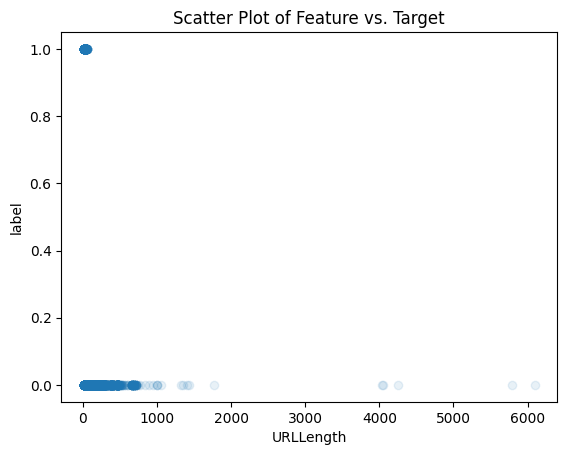

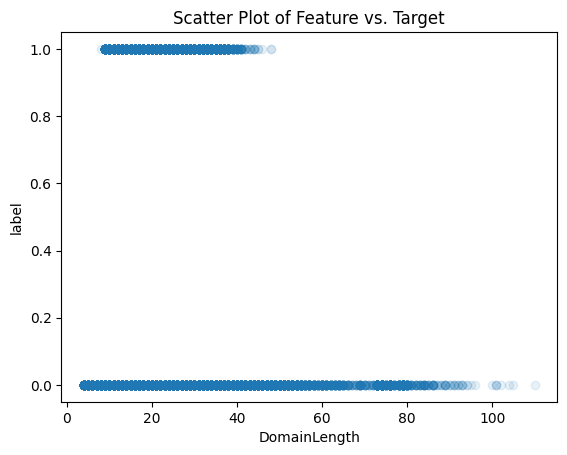

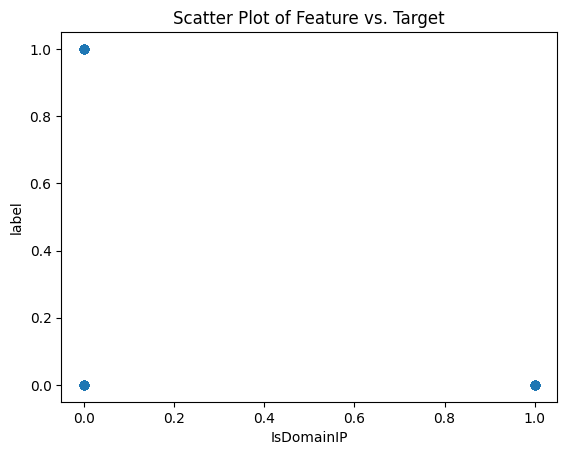

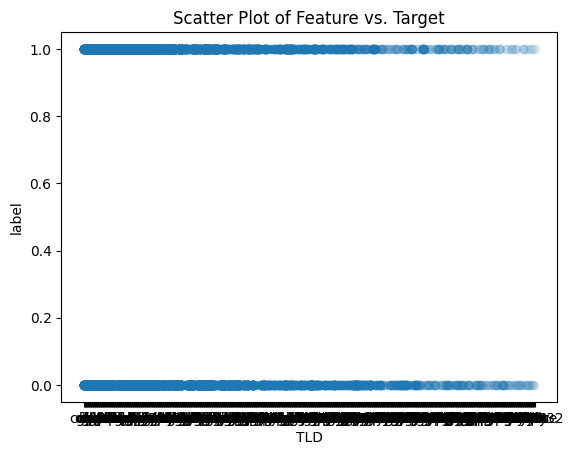

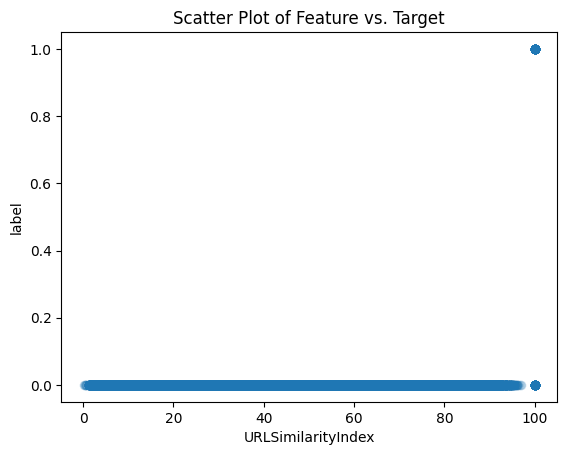

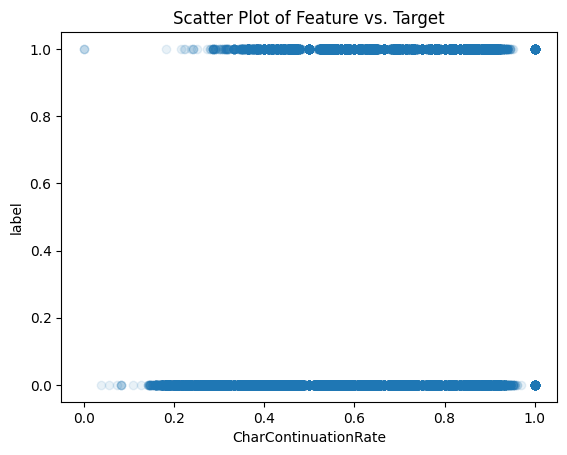

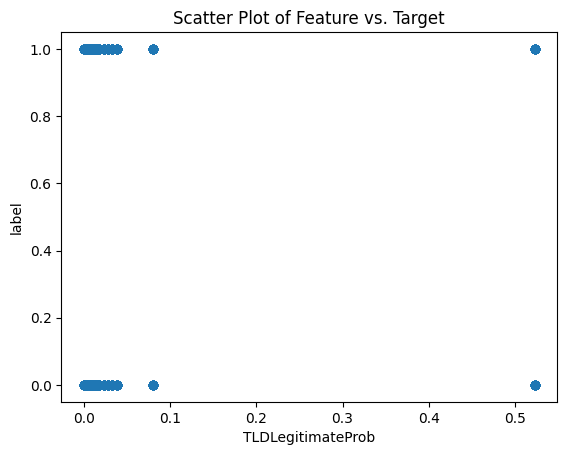

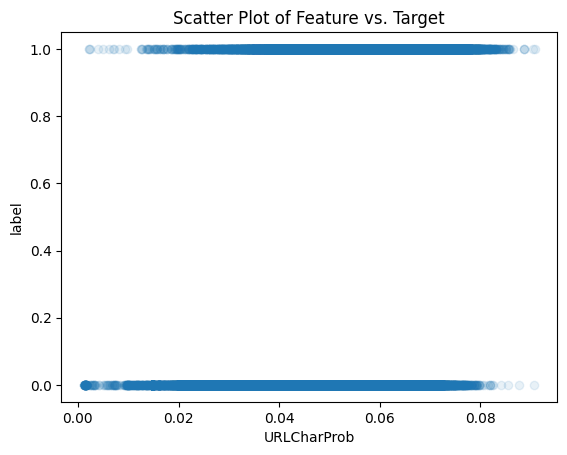

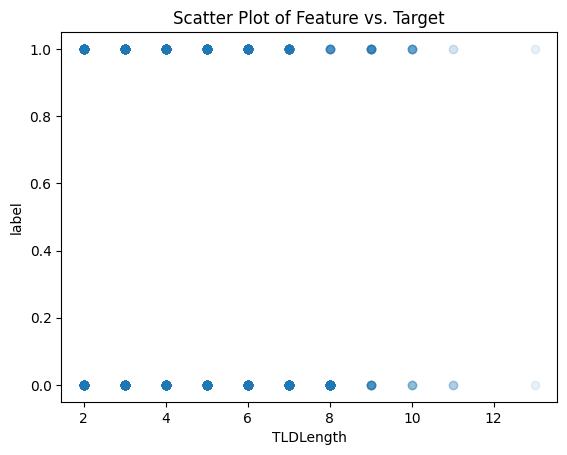

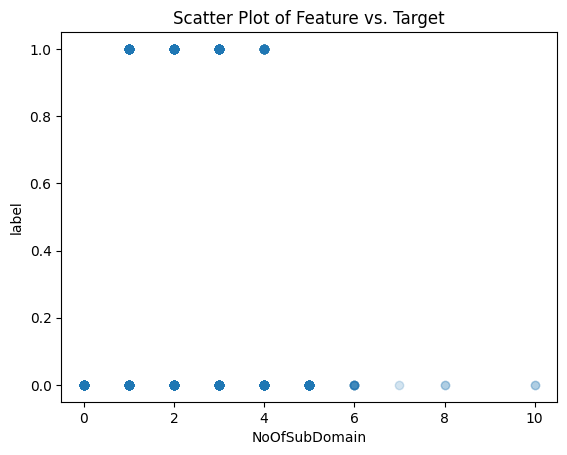

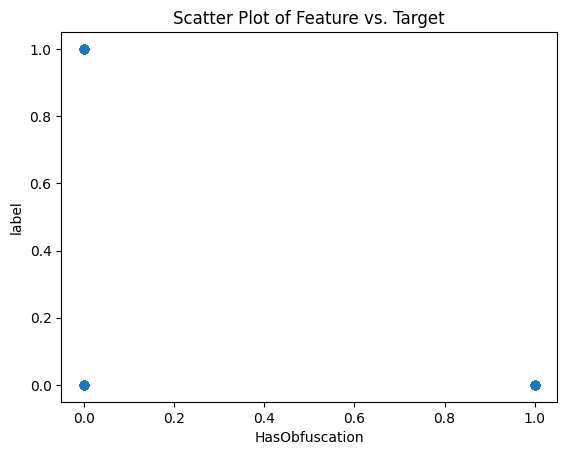

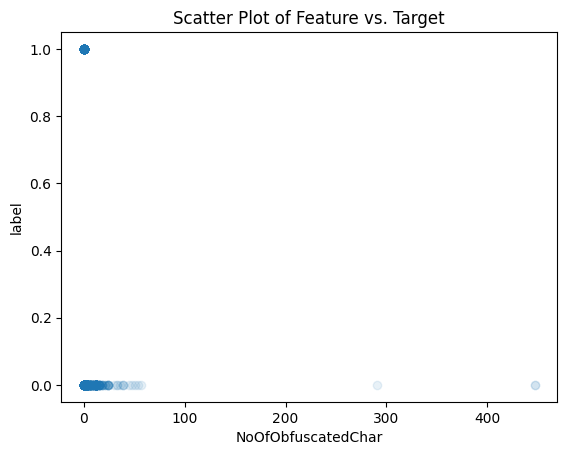

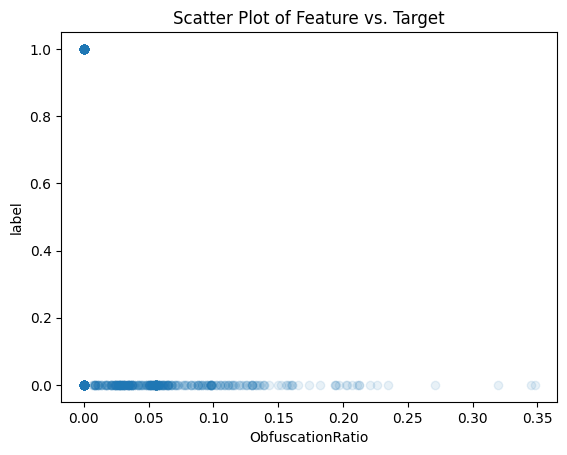

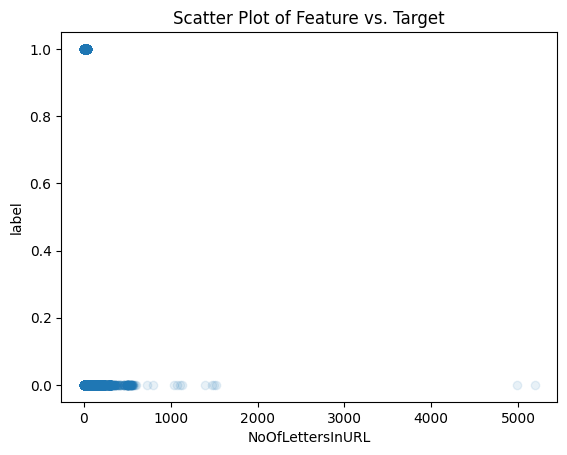

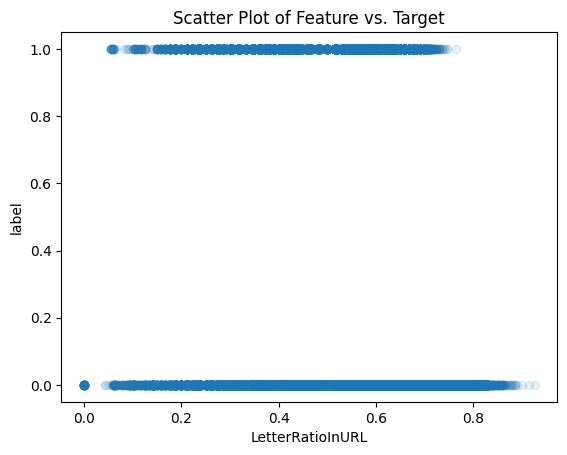

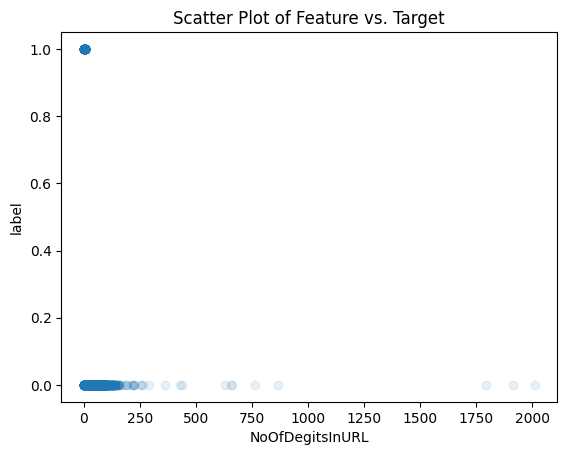

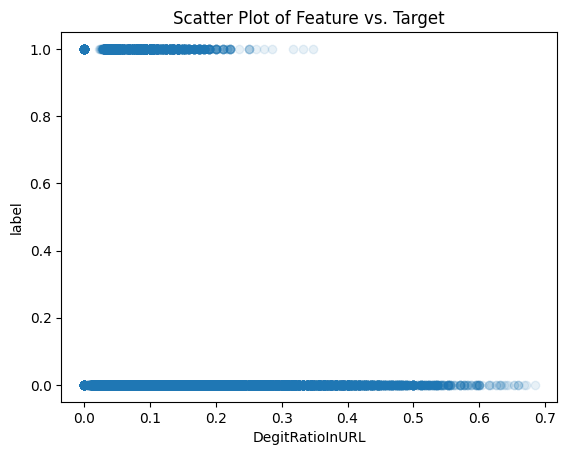

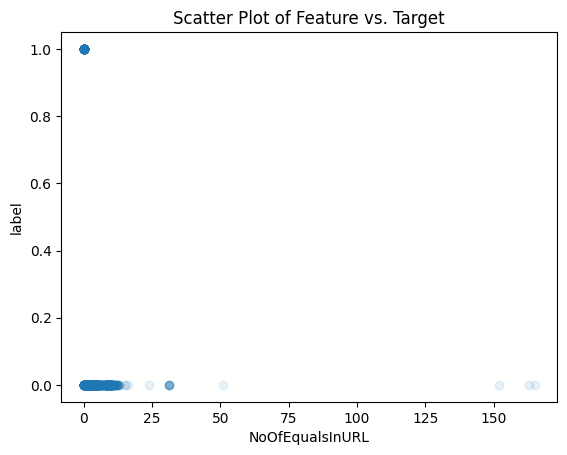

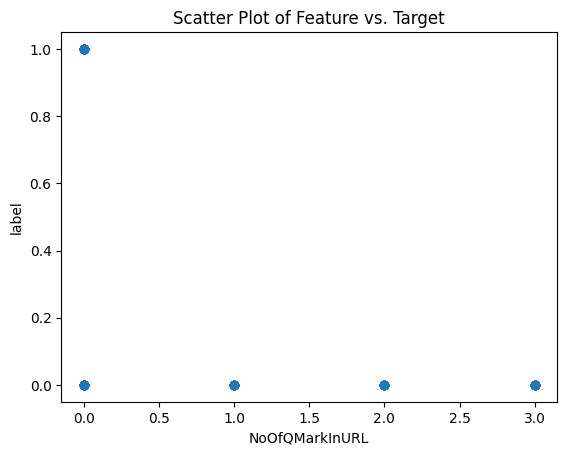

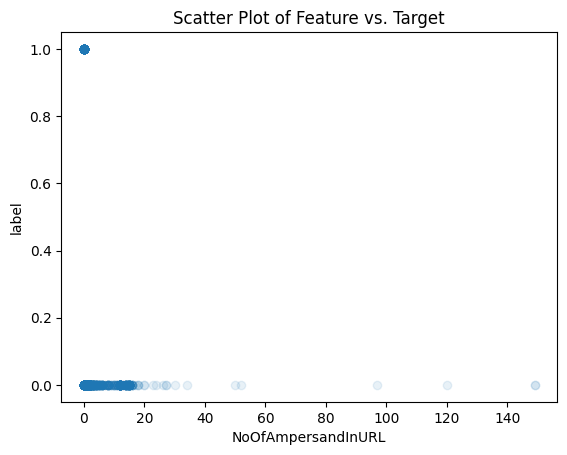

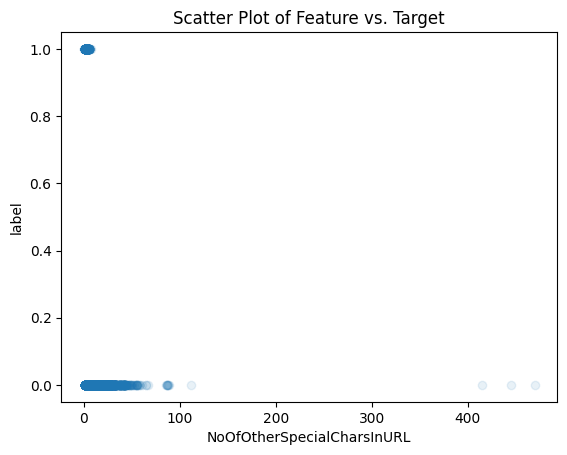

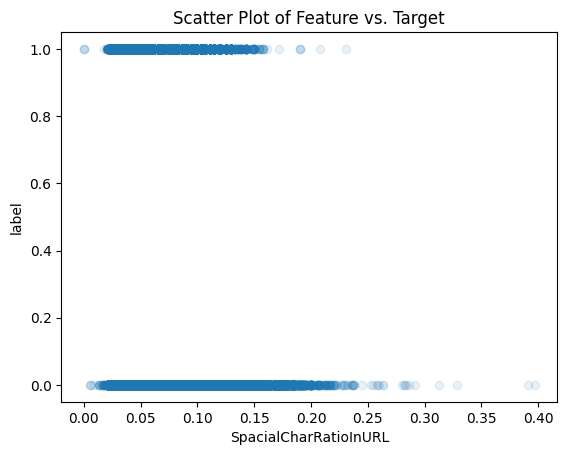

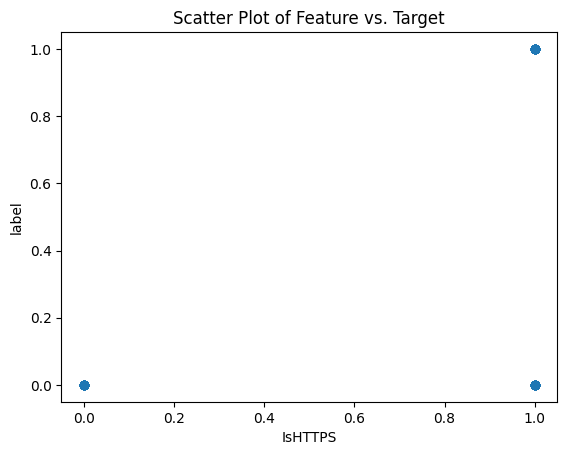

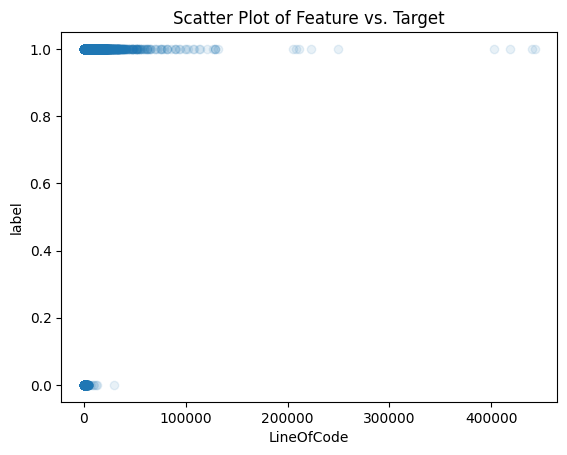

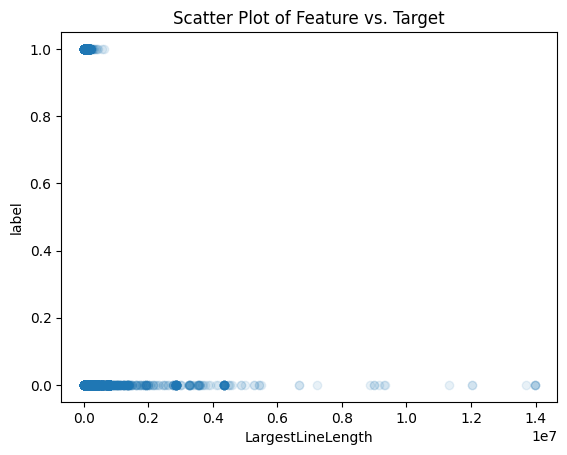

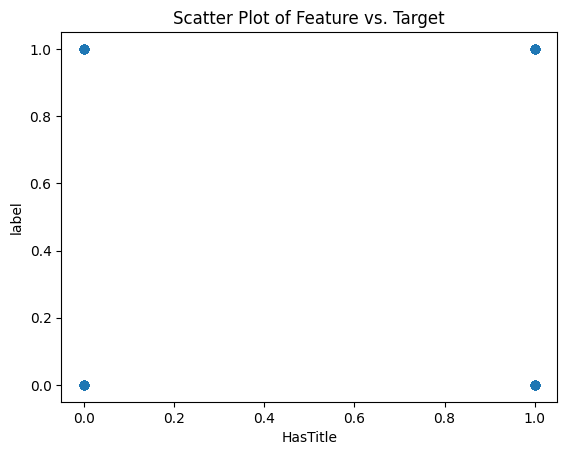

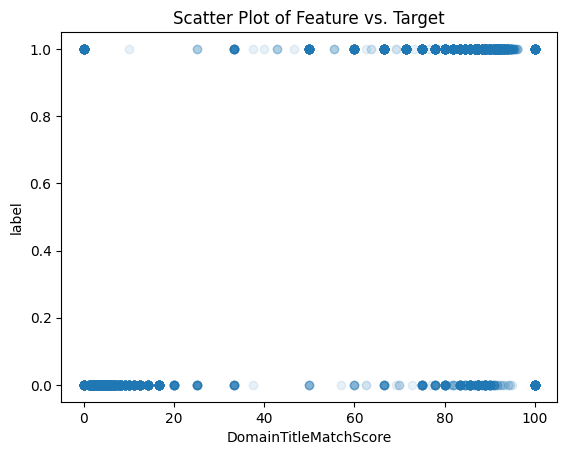

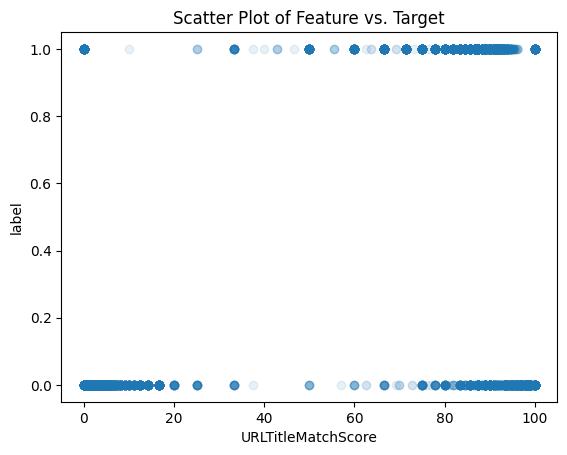

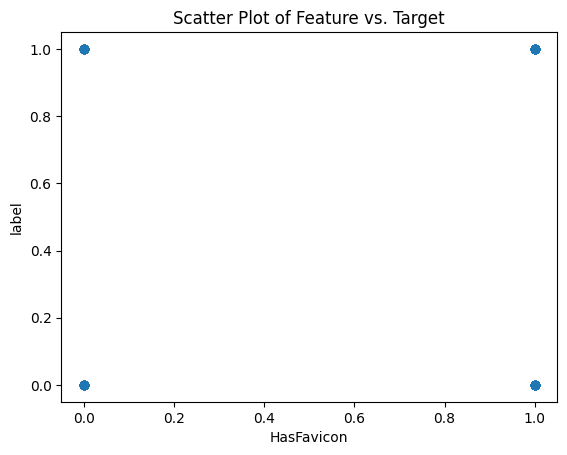

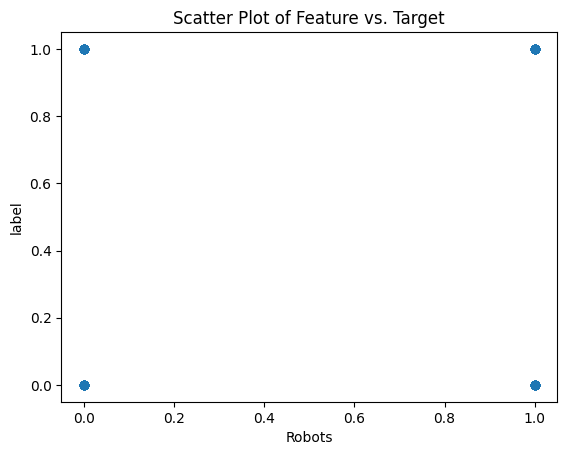

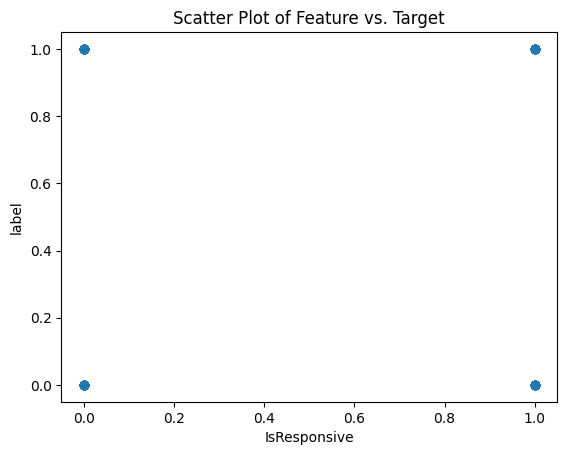

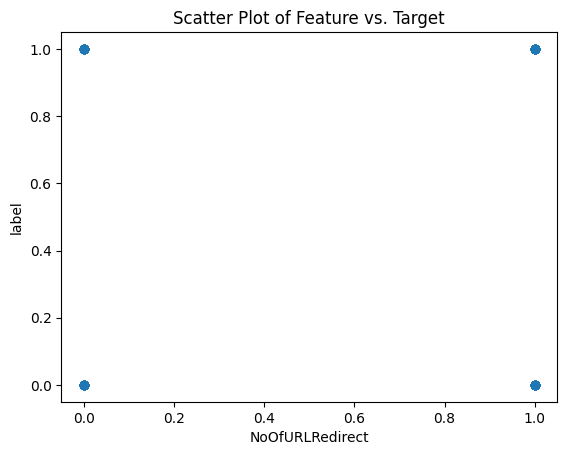

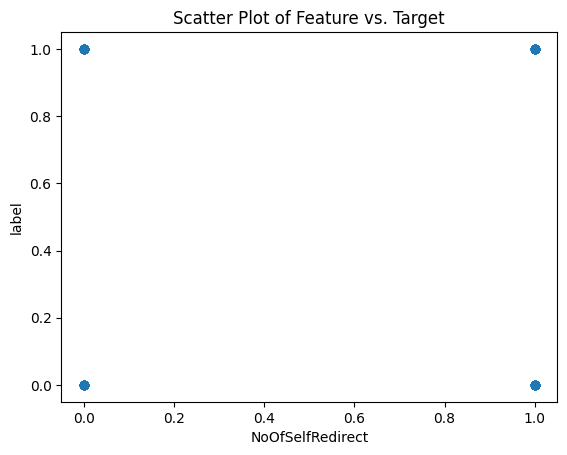

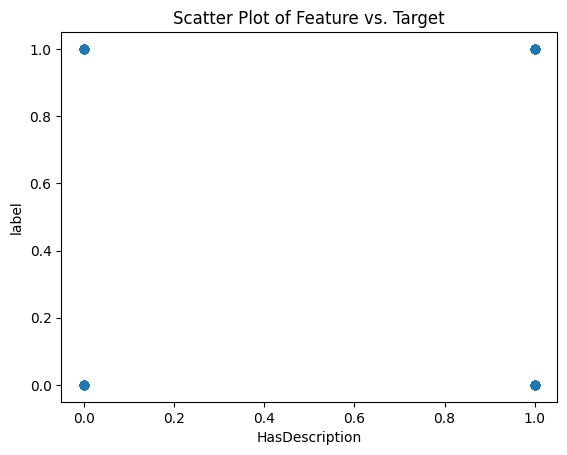

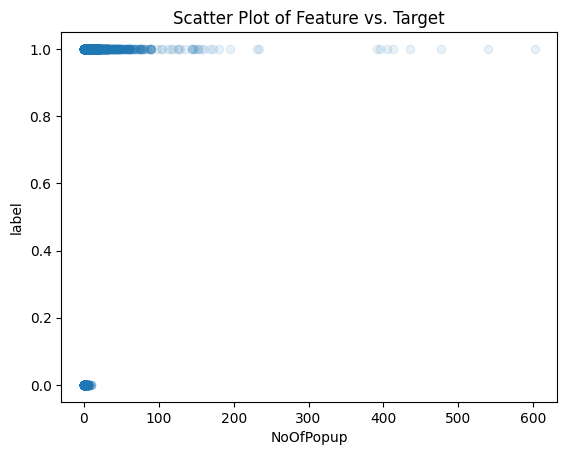

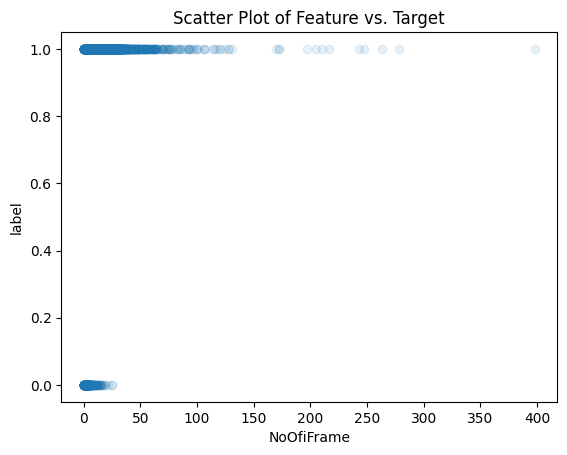

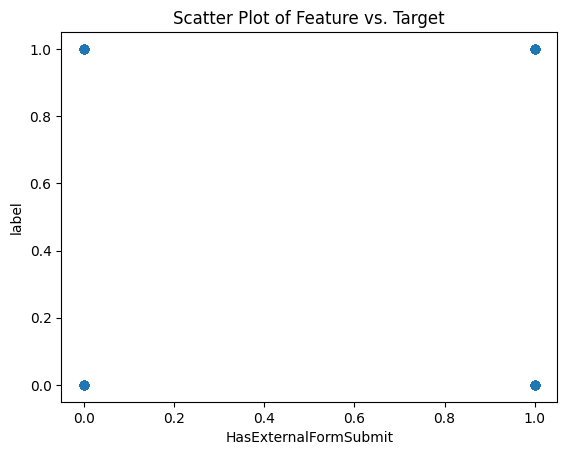

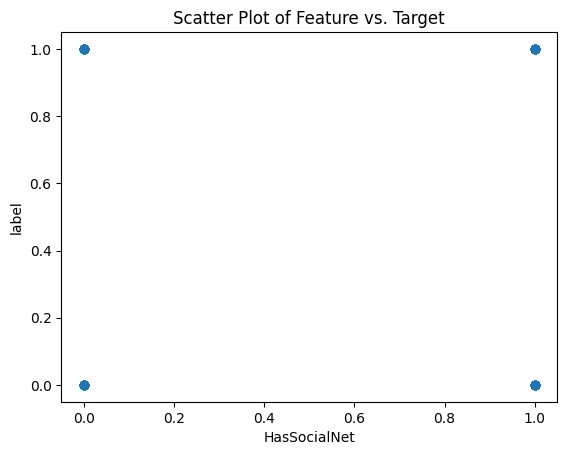

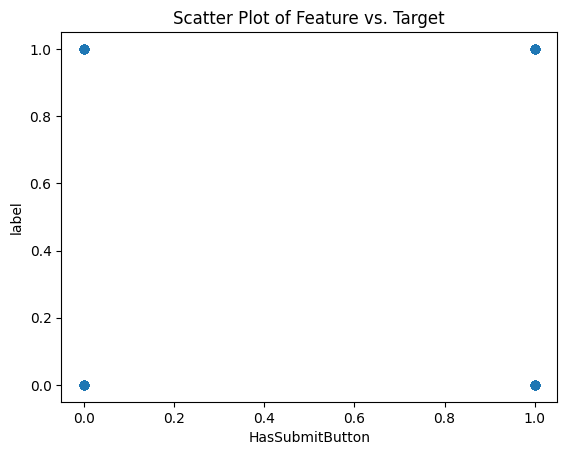

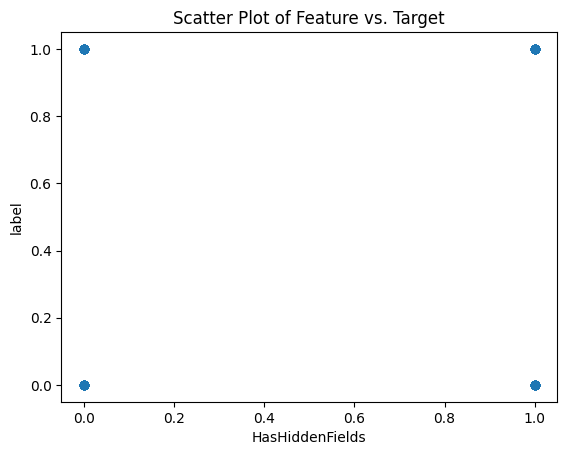

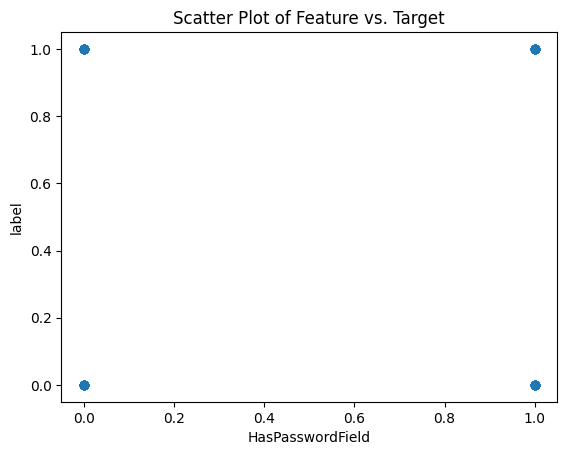

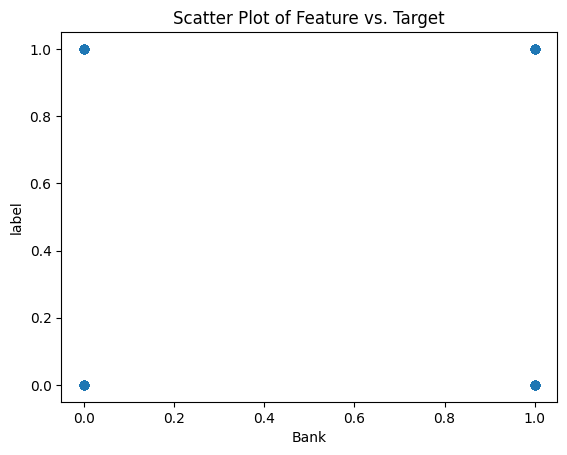

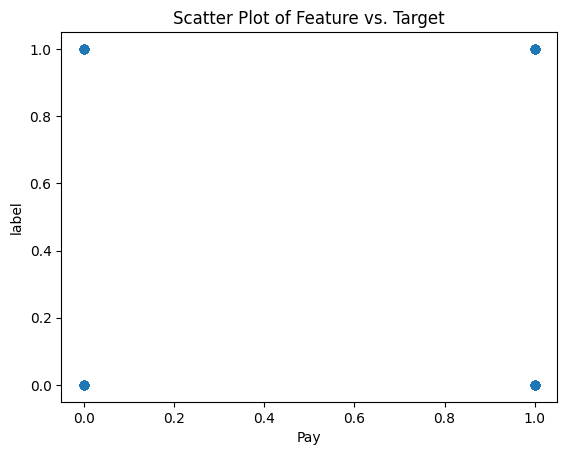

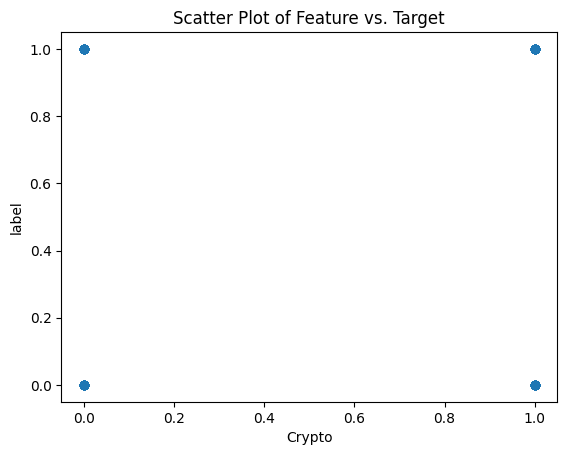

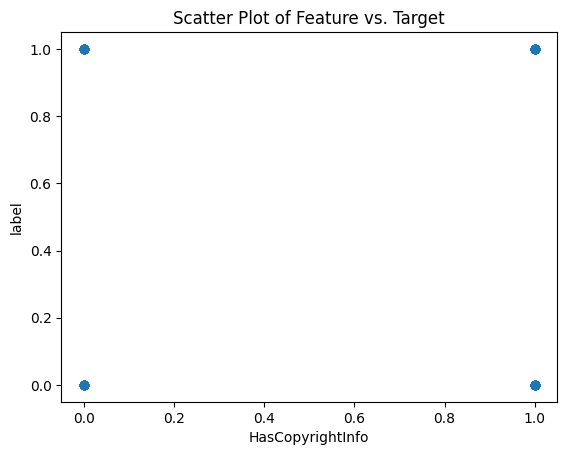

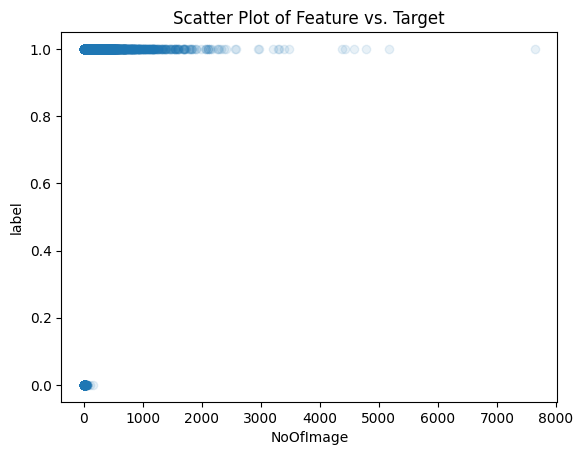

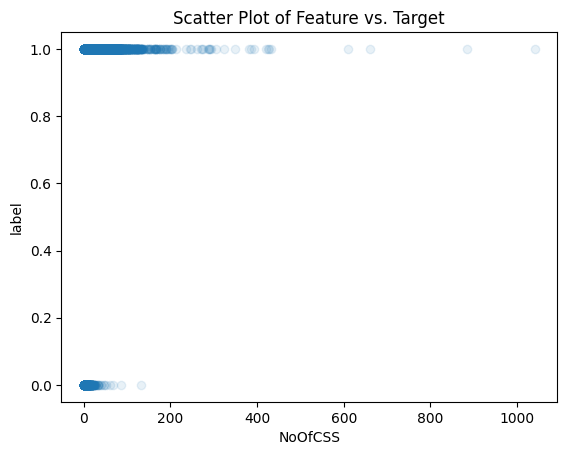

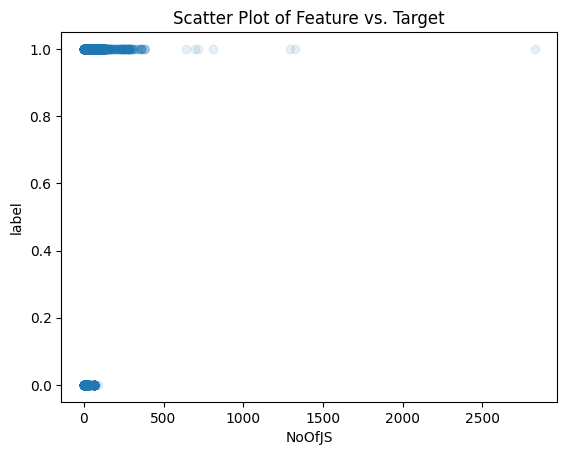

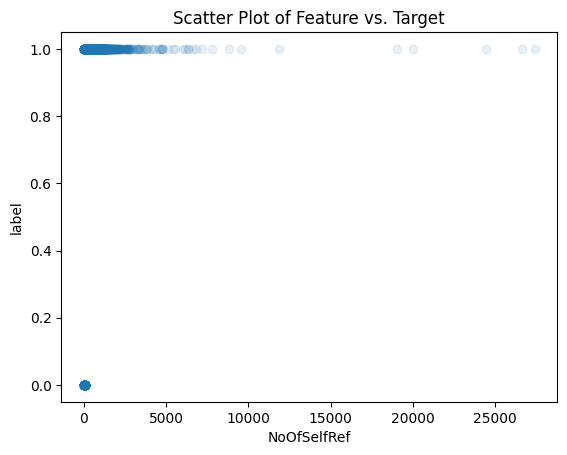

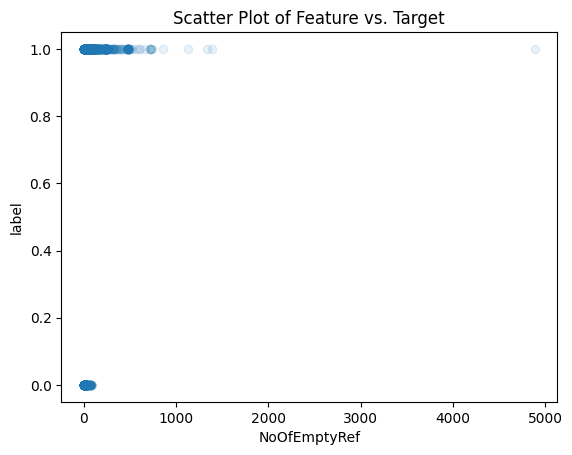

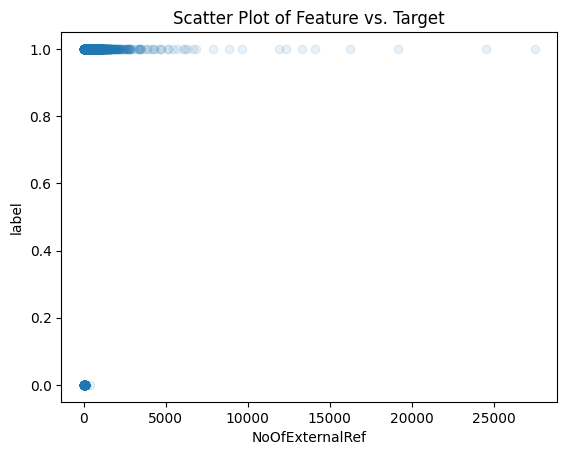

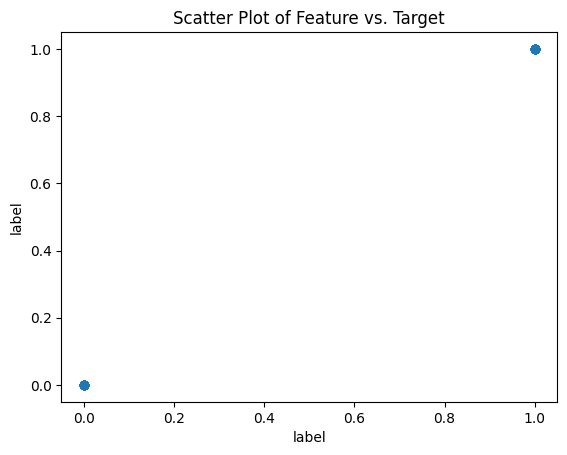

In [ ]:
for col in data.columns:
    plt.scatter(data[col], data['label'],alpha=0.1)
    plt.xlabel(f"{col}")
    plt.ylabel('label')
    plt.title('Scatter Plot of Feature vs. Target')
    plt.show()

In [ ]:
x = data.drop(labels=["label"],axis=1)
y = data["label"]

Encoding categorical variable

In [ ]:
x = pd.get_dummies(columns=["TLD"],data=x)
x.shape   #One hot encoding of categorical variable TLD as it has 66 distinct values and is an important feature

(188637, 717)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188637 entries, 0 to 188636
Columns: 717 entries, URLLength to TLD_zw
dtypes: bool(667), float64(10), int64(40)
memory usage: 192.0 MB


Splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split    #80 20 ratio split as this is a large database
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

Feature selection

In [ ]:
#To remove the features whose varience is below the threshold

from sklearn.feature_selection import VarianceThreshold
v = VarianceThreshold(threshold=0.01)
v.fit(x_train)
sum(v.get_support())

54

In [ ]:
remove1 = [col for col in x_train.columns if col not in x_train.columns[v.get_support()]]
print(remove1)

['IsDomainIP', 'URLCharProb', 'HasObfuscation', 'ObfuscationRatio', 'DegitRatioInURL', 'SpacialCharRatioInURL', 'TLD_100', 'TLD_101', 'TLD_103', 'TLD_106', 'TLD_107', 'TLD_108', 'TLD_11', 'TLD_110', 'TLD_116', 'TLD_117', 'TLD_12', 'TLD_120', 'TLD_123', 'TLD_125', 'TLD_126:8080', 'TLD_128', 'TLD_13', 'TLD_130', 'TLD_133:8080', 'TLD_134', 'TLD_136', 'TLD_14', 'TLD_140', 'TLD_145', 'TLD_146', 'TLD_148', 'TLD_149', 'TLD_15', 'TLD_150', 'TLD_151', 'TLD_154', 'TLD_155', 'TLD_158', 'TLD_160', 'TLD_161', 'TLD_163', 'TLD_165', 'TLD_166', 'TLD_167', 'TLD_171', 'TLD_173', 'TLD_177', 'TLD_178', 'TLD_181', 'TLD_182', 'TLD_184', 'TLD_185', 'TLD_189', 'TLD_197', 'TLD_198', 'TLD_199', 'TLD_20', 'TLD_200', 'TLD_203', 'TLD_206', 'TLD_210', 'TLD_211', 'TLD_211:8383', 'TLD_214', 'TLD_216', 'TLD_220', 'TLD_221', 'TLD_223', 'TLD_225', 'TLD_227', 'TLD_230', 'TLD_231', 'TLD_232', 'TLD_233', 'TLD_234', 'TLD_235', 'TLD_237', 'TLD_238', 'TLD_24', 'TLD_240', 'TLD_240:8087', 'TLD_242', 'TLD_243', 'TLD_249:8080', '

In [ ]:
x_train.drop(labels=remove1,axis=1,inplace=True)
x_train.shape

(150909, 54)

<Axes: >

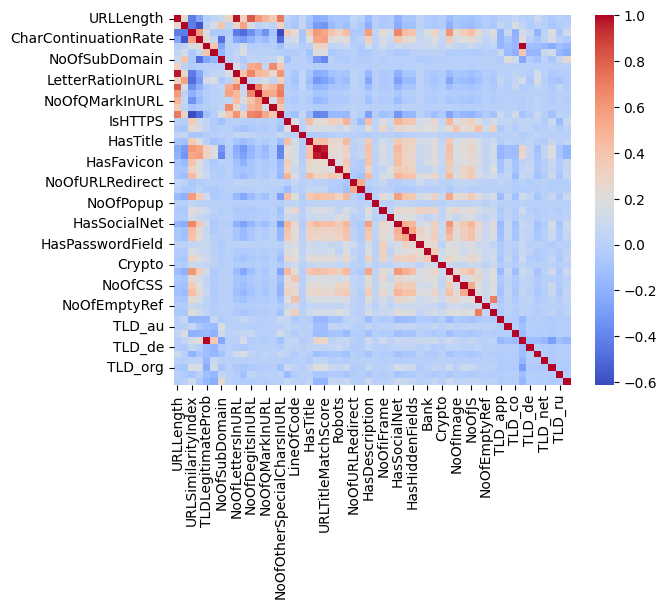

In [ ]:
#visualization of correlation of features
corr = x_train.corr()
plt.figure()
sns.heatmap(corr,cmap="coolwarm")

In [ ]:
#function to identify features whose correaltion is above the threshold
def correlation(dataset, threshold):
  s = set()
  corr = dataset.corr()
  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i,j])>threshold:
        colname = corr.columns[i]
        s.add(colname)
  return s

In [ ]:
remove2 = correlation(x_train,0.85)
print(remove2)

{'URLTitleMatchScore', 'NoOfLettersInURL', 'TLD_com'}


In [ ]:
x_train.drop(labels=remove2,axis=1,inplace=True)
x_train.shape

(150909, 51)

In [ ]:
#to select k best features
from sklearn.feature_selection import SelectKBest,chi2

#choosing 40 features
selector = SelectKBest(score_func=chi2,k=40)
selector.fit(x_train,y_train)
selector.get_support()

array([ True,  True,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True])

In [ ]:
remove3 = [col for col in x_train.columns if col not in x_train.columns[selector.get_support()]]
print(remove3)

['TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain', 'LetterRatioInURL', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'Crypto', 'TLD_au', 'TLD_de', 'TLD_net', 'TLD_ru']


In [ ]:
x_train.drop(labels=remove3,axis=1,inplace=True)
x_train.shape

(150909, 40)

In [ ]:
#the choosen features
features = x_train.columns
print(features)

Index(['URLLength', 'DomainLength', 'URLSimilarityIndex',
       'CharContinuationRate', 'NoOfObfuscatedChar', 'NoOfDegitsInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOfExternalRef', 'TLD_app', 'TLD_co', 'TLD_io',
       'TLD_org', 'TLD_uk'],
      dtype='object')


Scaling data

In [ ]:
#scaling after removing correlated features for higher accuracy of model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# converting into pandas dataframe
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test[features]),columns = x_test[features].columns)

In [ ]:
x_train.head()

,URLLength,DomainLength,URLSimilarityIndex,CharContinuationRate,NoOfObfuscatedChar,NoOfDegitsInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,...,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,TLD_app,TLD_co,TLD_io,TLD_org,TLD_uk
0,0.002465,0.160377,1.000000,0.714286,0.0,0.0,0.0,0.0,0.0,0.004494,...,0.080692,0.092006,0.008140,0.001023,0.008613,0.0,0.0,0.0,0.0,0.0
1,0.004931,0.292453,0.541012,0.571429,0.0,0.0,0.0,0.0,0.0,0.011236,...,0.000961,0.000754,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.002465,0.160377,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.002247,...,0.011527,0.003771,0.000767,0.000000,0.000727,0.0,0.0,0.0,0.0,0.0
3,0.002794,0.179245,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.002247,...,0.006724,0.013575,0.002701,0.001023,0.003234,0.0,0.0,0.0,0.0,0.0
4,0.001151,0.084906,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.002247,...,0.008646,0.010558,0.011388,0.000205,0.011448,0.0,0.0,0.0,0.0,0.0


Creating the model

In [ ]:
from tensorflow import keras
from keras.layers import Dense

#creating the model
model = keras.Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#defining early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    restore_best_weights = True

#compiling with adam algorithm
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

#fitting the model
history = model.fit(x_train, y_train, epochs=50, callbacks = early_stopping , batch_size=128, validation_data=(x_test[features], y_test))

Epoch 1/50
1179/1179 [==============================] - 4s 3ms/step - loss: 0.0240 - binary_accuracy: 0.9902 - val_loss: 0.0013 - val_binary_accuracy: 0.9998
Epoch 2/50
1179/1179 [==============================] - 3s 2ms/step - loss: 0.0018 - binary_accuracy: 0.9995 - val_loss: 0.0011 - val_binary_accuracy: 0.9998
Epoch 3/50
1179/1179 [==============================] - 4s 4ms/step - loss: 0.0012 - binary_accuracy: 0.9997 - val_loss: 3.6099e-04 - val_binary_accuracy: 0.9999
Epoch 4/50
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0012 - binary_accuracy: 0.9996 - val_loss: 3.2502e-04 - val_binary_accuracy: 0.9999
Epoch 5/50
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0011 - binary_accuracy: 0.9997 - val_loss: 2.9963e-04 - val_binary_accuracy: 0.9999
Epoch 6/50
1179/1179 [==============================] - 3s 3ms/step - loss: 8.7225e-04 - binary_accuracy: 0.9997 - val_loss: 5.6128e-04 - val_binary_accuracy: 0.9998
Epoch 7/50
1179/1179 [==========

Visualizing the accuracy and loss of training and testing sets

best validation loss:  0.000176442030351609
best validation accuracy:  0.9999470114707947


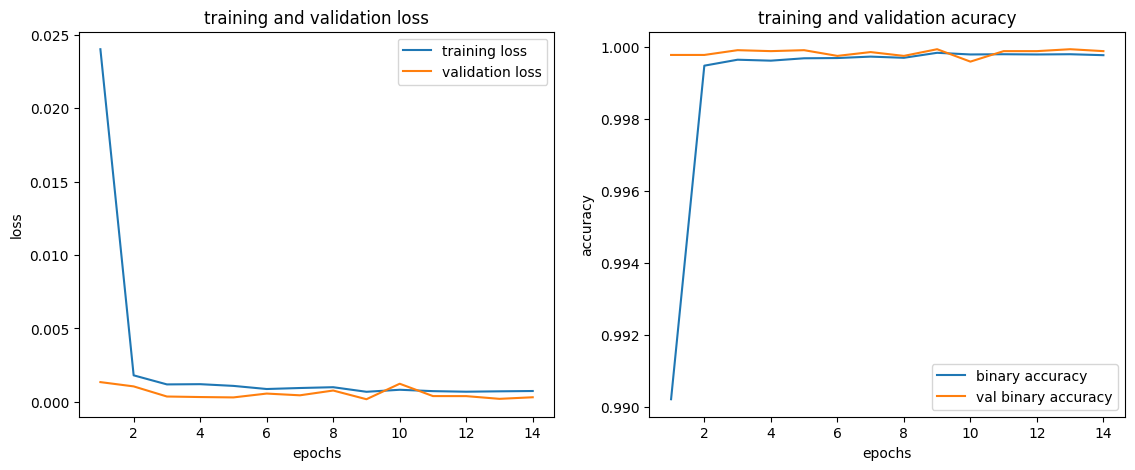

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13.5,5))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,len(loss_train)+1)
ax1.plot(epochs, loss_train, label='training loss')
ax1.plot(epochs, loss_val, label='validation loss')
ax1.set_title('training and validation loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
loss_train = history.history['binary_accuracy']
loss_val = history.history['val_binary_accuracy']
epochs = range(1,len(loss_train)+1)
ax2.plot(epochs, loss_train, label='binary accuracy')
ax2.plot(epochs, loss_val, label='val binary accuracy')
ax2.set_title('training and validation acuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()
print("best validation loss: ", min(history.history['val_loss']))
print("best validation accuracy: ", max(history.history['val_binary_accuracy']))
plt.show()

In [ ]:
#from the graphs we can conclude that the model isnt overfitting or underfitting

In [ ]:
#saving the model
from keras.models import save_model
model.save('URL_phishing_detection_model')